In [106]:
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
from math import ceil

In [103]:
x = [ 1.,   1.5,  2.,   2.5,  3.,   3.5,  4.,   4.5,  5.,   5.5,  6.,   6.5,  7.,   7.5, 8.,   8.5,  9.,   9.5, 10. ]
y = [3.43, 4.94, 6.45, 9.22, 6.32, 6.11, 4.63, 8.95, 7.8, 8.35, 11.45, 14.71, 11.97, 12.46, 17.42, 17.0, 15.45, 19.15, 20.86]

In [104]:
m, b, r, p, stdev = stats.linregress(x,y)
print(str(m) + "x +", b)
def lin_reg(x):
    return m*x + b

1.7484912280701754x + 1.2606666666666655


In [105]:
px = list(map(str, np.polyfit(x, y, 3)))
print(px[0]+"x^3 +", px[1]+"x^2 +", px[2]+"x +", px[3])

-0.0004778434499797004x^3 + 0.14943830163644475x^2 + 0.154461197557168x + 4.52517027863778


In [88]:
px = list(map(float, px))
def cubic_reg(x):
    return px[0]*x**3 + px[1]*x**2 + px[2]*x + px[3]
area, _ = integrate.quad(cubic_reg, x[0], x[-1])
print(area)

96.94082706766916


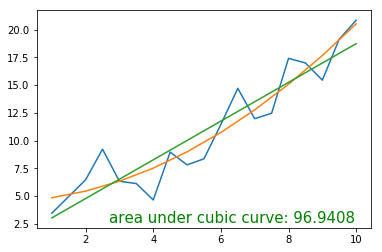

In [92]:
fig, ax1 = plt.subplots()
ax1.plot(x,y)

reg_domain = range(int(ceil(x[0])), int(ceil(x[-1])) + 1, 1)
cubic_y = [cubic_reg(i) for i in reg_domain]
lin_y = [lin_reg(i) for i in reg_domain]
ax1.plot(reg_domain, cubic_y)
ax1.plot(reg_domain, lin_y)

ax1.text(0.95, 0.01, 'area under cubic curve: {:0.4f}'.format(area),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='green', fontsize=15)

plt.show(fig)

In [91]:
def BIC(y, yhat, k, weight = 1):
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + weight*k*np.log(n)
    return B

In [102]:
pc = np.poly1d(px)
pl = np.poly1d(m)

{
    'cubic': BIC(y, pc(x), 3),
     'lin': BIC(y, pl(x), 1)
 }
print("Cubic is better because the BIC is lower")

Cubic is better because the BIC is lower
